In [1]:
#Decision Trees (DTs) are a non-parametric supervised learning method used for 
# classification and regression. The goal is to create a model that predicts the 
# value of a target variable by learning simple decision rules inferred from the 
# data features.
#For instance, in the example below, decision trees learn from data to approximate
#  a sine curve with a set of if-then-else decision rules. The deeper the tree, 
# the more complex the decision rules and the fitter the model.

In [1]:
#Classification
from sklearn import tree
x = [[0,0],[1,1]]
y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
clf.predict([[2,2]])
clf.predict_proba([[2,2]])

array([[ 0.,  1.]])

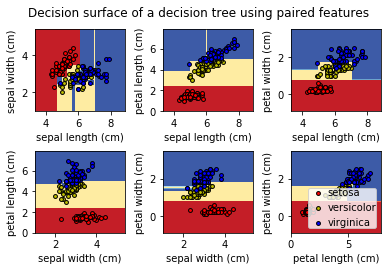

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()


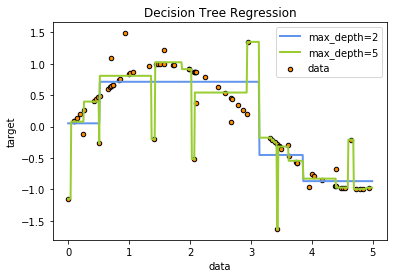

In [5]:
#Decision Tree Regression
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


In [6]:
x = [[0,0],[2,2]]
y = [0.5,2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x,y)
clf.predict([[1,1]])

array([ 0.5])

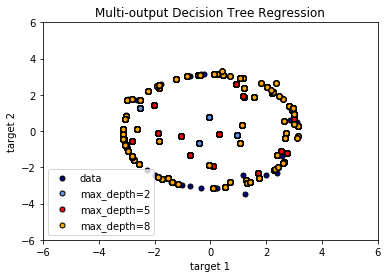

In [7]:
#Multi-output Decision Tree Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 50
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

In [8]:
# tree.py
"""
This module gathers tree-based methods, including decision, regression and
randomized trees. Single and multi-output problems are both handled.
"""

# Authors: Gilles Louppe <g.louppe@gmail.com>
#          Peter Prettenhofer <peter.prettenhofer@gmail.com>
#          Brian Holt <bdholt1@gmail.com>
#          Noel Dawe <noel@dawe.me>
#          Satrajit Gosh <satrajit.ghosh@gmail.com>
#          Joly Arnaud <arnaud.v.joly@gmail.com>
#          Fares Hedayati <fares.hedayati@gmail.com>
#          Nelson Liu <nelson@nelsonliu.me>
#
# License: BSD 3 clause

from __future__ import division


import numbers
import warnings
from abc import ABCMeta
from abc import abstractmethod
from math import ceil

import numpy as np
from scipy.sparse import issparse

from ..base import BaseEstimator
from ..base import ClassifierMixin
from ..base import RegressorMixin
from ..base import is_classifier
from ..externals import six
from ..utils import check_array
from ..utils import check_random_state
from ..utils import compute_sample_weight
from ..utils.multiclass import check_classification_targets
from ..utils.validation import check_is_fitted

from ._criterion import Criterion
from ._splitter import Splitter
from ._tree import DepthFirstTreeBuilder
from ._tree import BestFirstTreeBuilder
from ._tree import Tree
from . import _tree, _splitter, _criterion

__all__ = ["DecisionTreeClassifier",
           "DecisionTreeRegressor",
           "ExtraTreeClassifier",
           "ExtraTreeRegressor"]


# =============================================================================
# Types and constants
# =============================================================================

DTYPE = _tree.DTYPE
DOUBLE = _tree.DOUBLE

CRITERIA_CLF = {"gini": _criterion.Gini, "entropy": _criterion.Entropy}
CRITERIA_REG = {"mse": _criterion.MSE, "friedman_mse": _criterion.FriedmanMSE,
                "mae": _criterion.MAE}

DENSE_SPLITTERS = {"best": _splitter.BestSplitter,
                   "random": _splitter.RandomSplitter}

SPARSE_SPLITTERS = {"best": _splitter.BestSparseSplitter,
                    "random": _splitter.RandomSparseSplitter}

# =============================================================================
# Base decision tree
# =============================================================================


class BaseDecisionTree(six.with_metaclass(ABCMeta, BaseEstimator)):
    """Base class for decision trees.
    Warning: This class should not be used directly.
    Use derived classes instead.
    """

    @abstractmethod
    def __init__(self,
                 criterion,
                 splitter,
                 max_depth,
                 min_samples_split,
                 min_samples_leaf,
                 min_weight_fraction_leaf,
                 max_features,
                 max_leaf_nodes,
                 random_state,
                 min_impurity_decrease,
                 min_impurity_split,
                 class_weight=None,
                 presort=False):
        self.criterion = criterion
        self.splitter = splitter
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.max_leaf_nodes = max_leaf_nodes
        self.min_impurity_decrease = min_impurity_decrease
        self.min_impurity_split = min_impurity_split
        self.class_weight = class_weight
        self.presort = presort

    def fit(self, X, y, sample_weight=None, check_input=True,
            X_idx_sorted=None):

        random_state = check_random_state(self.random_state)
        if check_input:
            X = check_array(X, dtype=DTYPE, accept_sparse="csc")
            y = check_array(y, ensure_2d=False, dtype=None)
            if issparse(X):
                X.sort_indices()

                if X.indices.dtype != np.intc or X.indptr.dtype != np.intc:
                    raise ValueError("No support for np.int64 index based "
                                     "sparse matrices")

        # Determine output settings
        n_samples, self.n_features_ = X.shape
        is_classification = is_classifier(self)

        y = np.atleast_1d(y)
        expanded_class_weight = None

        if y.ndim == 1:
            # reshape is necessary to preserve the data contiguity against vs
            # [:, np.newaxis] that does not.
            y = np.reshape(y, (-1, 1))

        self.n_outputs_ = y.shape[1]

        if is_classification:
            check_classification_targets(y)
            y = np.copy(y)

            self.classes_ = []
            self.n_classes_ = []

            if self.class_weight is not None:
                y_original = np.copy(y)

            y_encoded = np.zeros(y.shape, dtype=np.int)
            for k in range(self.n_outputs_):
                classes_k, y_encoded[:, k] = np.unique(y[:, k],
                                                       return_inverse=True)
                self.classes_.append(classes_k)
                self.n_classes_.append(classes_k.shape[0])
            y = y_encoded

            if self.class_weight is not None:
                expanded_class_weight = compute_sample_weight(
                    self.class_weight, y_original)

        else:
            self.classes_ = [None] * self.n_outputs_
            self.n_classes_ = [1] * self.n_outputs_

        self.n_classes_ = np.array(self.n_classes_, dtype=np.intp)

        if getattr(y, "dtype", None) != DOUBLE or not y.flags.contiguous:
            y = np.ascontiguousarray(y, dtype=DOUBLE)

        # Check parameters
        max_depth = ((2 ** 31) - 1 if self.max_depth is None
                     else self.max_depth)
        max_leaf_nodes = (-1 if self.max_leaf_nodes is None
                          else self.max_leaf_nodes)

        if isinstance(self.min_samples_leaf, (numbers.Integral, np.integer)):
            if not 1 <= self.min_samples_leaf:
                raise ValueError("min_samples_leaf must be at least 1 "
                                 "or in (0, 0.5], got %s"
                                 % self.min_samples_leaf)
            min_samples_leaf = self.min_samples_leaf
        else:  # float
            if not 0. < self.min_samples_leaf <= 0.5:
                raise ValueError("min_samples_leaf must be at least 1 "
                                 "or in (0, 0.5], got %s"
                                 % self.min_samples_leaf)
            min_samples_leaf = int(ceil(self.min_samples_leaf * n_samples))

        if isinstance(self.min_samples_split, (numbers.Integral, np.integer)):
            if not 2 <= self.min_samples_split:
                raise ValueError("min_samples_split must be an integer "
                                 "greater than 1 or a float in (0.0, 1.0]; "
                                 "got the integer %s"
                                 % self.min_samples_split)
            min_samples_split = self.min_samples_split
        else:  # float
            if not 0. < self.min_samples_split <= 1.:
                raise ValueError("min_samples_split must be an integer "
                                 "greater than 1 or a float in (0.0, 1.0]; "
                                 "got the float %s"
                                 % self.min_samples_split)
            min_samples_split = int(ceil(self.min_samples_split * n_samples))
            min_samples_split = max(2, min_samples_split)

        min_samples_split = max(min_samples_split, 2 * min_samples_leaf)

        if isinstance(self.max_features, six.string_types):
            if self.max_features == "auto":
                if is_classification:
                    max_features = max(1, int(np.sqrt(self.n_features_)))
                else:
                    max_features = self.n_features_
            elif self.max_features == "sqrt":
                max_features = max(1, int(np.sqrt(self.n_features_)))
            elif self.max_features == "log2":
                max_features = max(1, int(np.log2(self.n_features_)))
            else:
                raise ValueError(
                    'Invalid value for max_features. Allowed string '
                    'values are "auto", "sqrt" or "log2".')
        elif self.max_features is None:
            max_features = self.n_features_
        elif isinstance(self.max_features, (numbers.Integral, np.integer)):
            max_features = self.max_features
        else:  # float
            if self.max_features > 0.0:
                max_features = max(1,
                                   int(self.max_features * self.n_features_))
            else:
                max_features = 0

        self.max_features_ = max_features

        if len(y) != n_samples:
            raise ValueError("Number of labels=%d does not match "
                             "number of samples=%d" % (len(y), n_samples))
        if not 0 <= self.min_weight_fraction_leaf <= 0.5:
            raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
        if max_depth <= 0:
            raise ValueError("max_depth must be greater than zero. ")
        if not (0 < max_features <= self.n_features_):
            raise ValueError("max_features must be in (0, n_features]")
        if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
            raise ValueError("max_leaf_nodes must be integral number but was "
                             "%r" % max_leaf_nodes)
        if -1 < max_leaf_nodes < 2:
            raise ValueError(("max_leaf_nodes {0} must be either None "
                              "or larger than 1").format(max_leaf_nodes))

        if sample_weight is not None:
            if (getattr(sample_weight, "dtype", None) != DOUBLE or
                    not sample_weight.flags.contiguous):
                sample_weight = np.ascontiguousarray(
                    sample_weight, dtype=DOUBLE)
            if len(sample_weight.shape) > 1:
                raise ValueError("Sample weights array has more "
                                 "than one dimension: %d" %
                                 len(sample_weight.shape))
            if len(sample_weight) != n_samples:
                raise ValueError("Number of weights=%d does not match "
                                 "number of samples=%d" %
                                 (len(sample_weight), n_samples))

        if expanded_class_weight is not None:
            if sample_weight is not None:
                sample_weight = sample_weight * expanded_class_weight
            else:
                sample_weight = expanded_class_weight

        # Set min_weight_leaf from min_weight_fraction_leaf
        if sample_weight is None:
            min_weight_leaf = (self.min_weight_fraction_leaf *
                               n_samples)
        else:
            min_weight_leaf = (self.min_weight_fraction_leaf *
                               np.sum(sample_weight))

        if self.min_impurity_split is not None:
            warnings.warn("The min_impurity_split parameter is deprecated and"
                          " will be removed in version 0.21. "
                          "Use the min_impurity_decrease parameter instead.",
                          DeprecationWarning)
            min_impurity_split = self.min_impurity_split
        else:
            min_impurity_split = 1e-7

        if min_impurity_split < 0.:
            raise ValueError("min_impurity_split must be greater than "
                             "or equal to 0")

        if self.min_impurity_decrease < 0.:
            raise ValueError("min_impurity_decrease must be greater than "
                             "or equal to 0")

        presort = self.presort
        # Allow presort to be 'auto', which means True if the dataset is dense,
        # otherwise it will be False.
        if self.presort == 'auto' and issparse(X):
            presort = False
        elif self.presort == 'auto':
            presort = True

        if presort is True and issparse(X):
            raise ValueError("Presorting is not supported for sparse "
                             "matrices.")

        # If multiple trees are built on the same dataset, we only want to
        # presort once. Splitters now can accept presorted indices if desired,
        # but do not handle any presorting themselves. Ensemble algorithms
        # which desire presorting must do presorting themselves and pass that
        # matrix into each tree.
        if X_idx_sorted is None and presort:
            X_idx_sorted = np.asfortranarray(np.argsort(X, axis=0),
                                             dtype=np.int32)

        if presort and X_idx_sorted.shape != X.shape:
            raise ValueError("The shape of X (X.shape = {}) doesn't match "
                             "the shape of X_idx_sorted (X_idx_sorted"
                             ".shape = {})".format(X.shape,
                                                   X_idx_sorted.shape))

        # Build tree
        criterion = self.criterion
        if not isinstance(criterion, Criterion):
            if is_classification:
                criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
                                                         self.n_classes_)
            else:
                criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
                                                         n_samples)

        SPLITTERS = SPARSE_SPLITTERS if issparse(X) else DENSE_SPLITTERS

        splitter = self.splitter
        if not isinstance(self.splitter, Splitter):
            splitter = SPLITTERS[self.splitter](criterion,
                                                self.max_features_,
                                                min_samples_leaf,
                                                min_weight_leaf,
                                                random_state,
                                                self.presort)

        self.tree_ = Tree(self.n_features_, self.n_classes_, self.n_outputs_)

        # Use BestFirst if max_leaf_nodes given; use DepthFirst otherwise
        if max_leaf_nodes < 0:
            builder = DepthFirstTreeBuilder(splitter, min_samples_split,
                                            min_samples_leaf,
                                            min_weight_leaf,
                                            max_depth,
                                            self.min_impurity_decrease,
                                            min_impurity_split)
        else:
            builder = BestFirstTreeBuilder(splitter, min_samples_split,
                                           min_samples_leaf,
                                           min_weight_leaf,
                                           max_depth,
                                           max_leaf_nodes,
                                           self.min_impurity_decrease,
                                           min_impurity_split)

        builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)

        if self.n_outputs_ == 1:
            self.n_classes_ = self.n_classes_[0]
            self.classes_ = self.classes_[0]

        return self

    def _validate_X_predict(self, X, check_input):
        """Validate X whenever one tries to predict, apply, predict_proba"""
        if check_input:
            X = check_array(X, dtype=DTYPE, accept_sparse="csr")
            if issparse(X) and (X.indices.dtype != np.intc or
                                X.indptr.dtype != np.intc):
                raise ValueError("No support for np.int64 index based "
                                 "sparse matrices")

        n_features = X.shape[1]
        if self.n_features_ != n_features:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is %s and "
                             "input n_features is %s "
                             % (self.n_features_, n_features))

        return X

    def predict(self, X, check_input=True):
        """Predict class or regression value for X.
        For a classification model, the predicted class for each sample in X is
        returned. For a regression model, the predicted value based on X is
        returned.
        Parameters
        ----------
        X : array-like or sparse matrix of shape = [n_samples, n_features]
            The input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csr_matrix``.
        check_input : boolean, (default=True)
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you do.
        Returns
        -------
        y : array of shape = [n_samples] or [n_samples, n_outputs]
            The predicted classes, or the predict values.
        """
        check_is_fitted(self, 'tree_')
        X = self._validate_X_predict(X, check_input)
        proba = self.tree_.predict(X)
        n_samples = X.shape[0]

        # Classification
        if is_classifier(self):
            if self.n_outputs_ == 1:
                return self.classes_.take(np.argmax(proba, axis=1), axis=0)

            else:
                predictions = np.zeros((n_samples, self.n_outputs_))

                for k in range(self.n_outputs_):
                    predictions[:, k] = self.classes_[k].take(
                        np.argmax(proba[:, k], axis=1),
                        axis=0)

                return predictions

        # Regression
        else:
            if self.n_outputs_ == 1:
                return proba[:, 0]

            else:
                return proba[:, :, 0]

    def apply(self, X, check_input=True):
        """
        Returns the index of the leaf that each sample is predicted as.
        .. versionadded:: 0.17
        Parameters
        ----------
        X : array_like or sparse matrix, shape = [n_samples, n_features]
            The input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csr_matrix``.
        check_input : boolean, (default=True)
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you do.
        Returns
        -------
        X_leaves : array_like, shape = [n_samples,]
            For each datapoint x in X, return the index of the leaf x
            ends up in. Leaves are numbered within
            ``[0; self.tree_.node_count)``, possibly with gaps in the
            numbering.
        """
        check_is_fitted(self, 'tree_')
        X = self._validate_X_predict(X, check_input)
        return self.tree_.apply(X)

    def decision_path(self, X, check_input=True):
        """Return the decision path in the tree
        .. versionadded:: 0.18
        Parameters
        ----------
        X : array_like or sparse matrix, shape = [n_samples, n_features]
            The input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csr_matrix``.
        check_input : boolean, (default=True)
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you do.
        Returns
        -------
        indicator : sparse csr array, shape = [n_samples, n_nodes]
            Return a node indicator matrix where non zero elements
            indicates that the samples goes through the nodes.
        """
        X = self._validate_X_predict(X, check_input)
        return self.tree_.decision_path(X)

    @property
    def feature_importances_(self):
        """Return the feature importances.
        The importance of a feature is computed as the (normalized) total
        reduction of the criterion brought by that feature.
        It is also known as the Gini importance.
        Returns
        -------
        feature_importances_ : array, shape = [n_features]
        """
        check_is_fitted(self, 'tree_')

        return self.tree_.compute_feature_importances()


# =============================================================================
# Public estimators
# =============================================================================

class DecisionTreeClassifier(BaseDecisionTree, ClassifierMixin):
    """A decision tree classifier.
    Read more in the :ref:`User Guide <tree>`.
    Parameters
    ----------
    criterion : string, optional (default="gini")
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.
    splitter : string, optional (default="best")
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.
    max_depth : int or None, optional (default=None)
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.
    min_samples_split : int, float, optional (default=2)
        The minimum number of samples required to split an internal node:
        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_split` is a percentage and
          `ceil(min_samples_split * n_samples)` are the minimum
          number of samples for each split.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_samples_leaf : int, float, optional (default=1)
        The minimum number of samples required to be at a leaf node:
        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a percentage and
          `ceil(min_samples_leaf * n_samples)` are the minimum
          number of samples for each node.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_weight_fraction_leaf : float, optional (default=0.)
        The minimum weighted fraction of the sum total of weights (of all
        the input samples) required to be at a leaf node. Samples have
        equal weight when sample_weight is not provided.
    max_features : int, float, string or None, optional (default=None)
        The number of features to consider when looking for the best split:
            - If int, then consider `max_features` features at each split.
            - If float, then `max_features` is a percentage and
              `int(max_features * n_features)` features are considered at each
              split.
            - If "auto", then `max_features=sqrt(n_features)`.
            - If "sqrt", then `max_features=sqrt(n_features)`.
            - If "log2", then `max_features=log2(n_features)`.
            - If None, then `max_features=n_features`.
        Note: the search for a split does not stop until at least one
        valid partition of the node samples is found, even if it requires to
        effectively inspect more than ``max_features`` features.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    max_leaf_nodes : int or None, optional (default=None)
        Grow a tree with ``max_leaf_nodes`` in best-first fashion.
        Best nodes are defined as relative reduction in impurity.
        If None then unlimited number of leaf nodes.
    min_impurity_decrease : float, optional (default=0.)
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.
        The weighted impurity decrease equation is the following::
            N_t / N * (impurity - N_t_R / N_t * right_impurity
                                - N_t_L / N_t * left_impurity)
        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.
        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.
        .. versionadded:: 0.19
    min_impurity_split : float,
        Threshold for early stopping in tree growth. A node will split
        if its impurity is above the threshold, otherwise it is a leaf.
        .. deprecated:: 0.19
           ``min_impurity_split`` has been deprecated in favor of
           ``min_impurity_decrease`` in 0.19 and will be removed in 0.21.
           Use ``min_impurity_decrease`` instead.
    class_weight : dict, list of dicts, "balanced" or None, default=None
        Weights associated with classes in the form ``{class_label: weight}``.
        If not given, all classes are supposed to have weight one. For
        multi-output problems, a list of dicts can be provided in the same
        order as the columns of y.
        Note that for multioutput (including multilabel) weights should be
        defined for each class of every column in its own dict. For example,
        for four-class multilabel classification weights should be
        [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
        [{1:1}, {2:5}, {3:1}, {4:1}].
        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``
        For multi-output, the weights of each column of y will be multiplied.
        Note that these weights will be multiplied with sample_weight (passed
        through the fit method) if sample_weight is specified.
    presort : bool, optional (default=False)
        Whether to presort the data to speed up the finding of best splits in
        fitting. For the default settings of a decision tree on large
        datasets, setting this to true may slow down the training process.
        When using either a smaller dataset or a restricted depth, this may
        speed up the training.
    Attributes
    ----------
    classes_ : array of shape = [n_classes] or a list of such arrays
        The classes labels (single output problem),
        or a list of arrays of class labels (multi-output problem).
    feature_importances_ : array of shape = [n_features]
        The feature importances. The higher, the more important the
        feature. The importance of a feature is computed as the (normalized)
        total reduction of the criterion brought by that feature.  It is also
        known as the Gini importance [4]_.
    max_features_ : int,
        The inferred value of max_features.
    n_classes_ : int or list
        The number of classes (for single output problems),
        or a list containing the number of classes for each
        output (for multi-output problems).
    n_features_ : int
        The number of features when ``fit`` is performed.
    n_outputs_ : int
        The number of outputs when ``fit`` is performed.
    tree_ : Tree object
        The underlying Tree object.
    Notes
    -----
    The default values for the parameters controlling the size of the trees
    (e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
    unpruned trees which can potentially be very large on some data sets. To
    reduce memory consumption, the complexity and size of the trees should be
    controlled by setting those parameter values.
    The features are always randomly permuted at each split. Therefore,
    the best found split may vary, even with the same training data and
    ``max_features=n_features``, if the improvement of the criterion is
    identical for several splits enumerated during the search of the best
    split. To obtain a deterministic behaviour during fitting,
    ``random_state`` has to be fixed.
    See also
    --------
    DecisionTreeRegressor
    References
    ----------
    .. [1] https://en.wikipedia.org/wiki/Decision_tree_learning
    .. [2] L. Breiman, J. Friedman, R. Olshen, and C. Stone, "Classification
           and Regression Trees", Wadsworth, Belmont, CA, 1984.
    .. [3] T. Hastie, R. Tibshirani and J. Friedman. "Elements of Statistical
           Learning", Springer, 2009.
    .. [4] L. Breiman, and A. Cutler, "Random Forests",
           http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm
    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn.model_selection import cross_val_score
    >>> from sklearn.tree import DecisionTreeClassifier
    >>> clf = DecisionTreeClassifier(random_state=0)
    >>> iris = load_iris()
    >>> cross_val_score(clf, iris.data, iris.target, cv=10)
    ...                             # doctest: +SKIP
    ...
    array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
            0.93...,  0.93...,  1.     ,  0.93...,  1.      ])
    """
    def __init__(self,
                 criterion="gini",
                 splitter="best",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features=None,
                 random_state=None,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 class_weight=None,
                 presort=False):
        super(DecisionTreeClassifier, self).__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            class_weight=class_weight,
            random_state=random_state,
            min_impurity_decrease=min_impurity_decrease,
            min_impurity_split=min_impurity_split,
            presort=presort)

    def fit(self, X, y, sample_weight=None, check_input=True,
            X_idx_sorted=None):
        """Build a decision tree classifier from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples] or [n_samples, n_outputs]
            The target values (class labels) as integers or strings.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted. Splits
            that would create child nodes with net zero or negative weight are
            ignored while searching for a split in each node. Splits are also
            ignored if they would result in any single class carrying a
            negative weight in either child node.
        check_input : boolean, (default=True)
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you do.
        X_idx_sorted : array-like, shape = [n_samples, n_features], optional
            The indexes of the sorted training input samples. If many tree
            are grown on the same dataset, this allows the ordering to be
            cached between trees. If None, the data will be sorted here.
            Don't use this parameter unless you know what to do.
        Returns
        -------
        self : object
            Returns self.
        """

        super(DecisionTreeClassifier, self).fit(
            X, y,
            sample_weight=sample_weight,
            check_input=check_input,
            X_idx_sorted=X_idx_sorted)
        return self

    def predict_proba(self, X, check_input=True):
        """Predict class probabilities of the input samples X.
        The predicted class probability is the fraction of samples of the same
        class in a leaf.
        check_input : boolean, (default=True)
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you do.
        Parameters
        ----------
        X : array-like or sparse matrix of shape = [n_samples, n_features]
            The input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csr_matrix``.
        check_input : bool
            Run check_array on X.
        Returns
        -------
        p : array of shape = [n_samples, n_classes], or a list of n_outputs
            such arrays if n_outputs > 1.
            The class probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        check_is_fitted(self, 'tree_')
        X = self._validate_X_predict(X, check_input)
        proba = self.tree_.predict(X)

        if self.n_outputs_ == 1:
            proba = proba[:, :self.n_classes_]
            normalizer = proba.sum(axis=1)[:, np.newaxis]
            normalizer[normalizer == 0.0] = 1.0
            proba /= normalizer

            return proba

        else:
            all_proba = []

            for k in range(self.n_outputs_):
                proba_k = proba[:, k, :self.n_classes_[k]]
                normalizer = proba_k.sum(axis=1)[:, np.newaxis]
                normalizer[normalizer == 0.0] = 1.0
                proba_k /= normalizer
                all_proba.append(proba_k)

            return all_proba

    def predict_log_proba(self, X):
        """Predict class log-probabilities of the input samples X.
        Parameters
        ----------
        X : array-like or sparse matrix of shape = [n_samples, n_features]
            The input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csr_matrix``.
        Returns
        -------
        p : array of shape = [n_samples, n_classes], or a list of n_outputs
            such arrays if n_outputs > 1.
            The class log-probabilities of the input samples. The order of the
            classes corresponds to that in the attribute `classes_`.
        """
        proba = self.predict_proba(X)

        if self.n_outputs_ == 1:
            return np.log(proba)

        else:
            for k in range(self.n_outputs_):
                proba[k] = np.log(proba[k])

            return proba


class DecisionTreeRegressor(BaseDecisionTree, RegressorMixin):
    """A decision tree regressor.
    Read more in the :ref:`User Guide <tree>`.
    Parameters
    ----------
    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion and minimizes the L2 loss
        using the mean of each terminal node, "friedman_mse", which uses mean
        squared error with Friedman's improvement score for potential splits,
        and "mae" for the mean absolute error, which minimizes the L1 loss
        using the median of each terminal node.
        .. versionadded:: 0.18
           Mean Absolute Error (MAE) criterion.
    splitter : string, optional (default="best")
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.
    max_depth : int or None, optional (default=None)
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.
    min_samples_split : int, float, optional (default=2)
        The minimum number of samples required to split an internal node:
        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_split` is a percentage and
          `ceil(min_samples_split * n_samples)` are the minimum
          number of samples for each split.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_samples_leaf : int, float, optional (default=1)
        The minimum number of samples required to be at a leaf node:
        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a percentage and
          `ceil(min_samples_leaf * n_samples)` are the minimum
          number of samples for each node.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_weight_fraction_leaf : float, optional (default=0.)
        The minimum weighted fraction of the sum total of weights (of all
        the input samples) required to be at a leaf node. Samples have
        equal weight when sample_weight is not provided.
    max_features : int, float, string or None, optional (default=None)
        The number of features to consider when looking for the best split:
        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a percentage and
          `int(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=n_features`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.
        Note: the search for a split does not stop until at least one
        valid partition of the node samples is found, even if it requires to
        effectively inspect more than ``max_features`` features.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    max_leaf_nodes : int or None, optional (default=None)
        Grow a tree with ``max_leaf_nodes`` in best-first fashion.
        Best nodes are defined as relative reduction in impurity.
        If None then unlimited number of leaf nodes.
    min_impurity_decrease : float, optional (default=0.)
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.
        The weighted impurity decrease equation is the following::
            N_t / N * (impurity - N_t_R / N_t * right_impurity
                                - N_t_L / N_t * left_impurity)
        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.
        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.
        .. versionadded:: 0.19
    min_impurity_split : float,
        Threshold for early stopping in tree growth. A node will split
        if its impurity is above the threshold, otherwise it is a leaf.
        .. deprecated:: 0.19
           ``min_impurity_split`` has been deprecated in favor of
           ``min_impurity_decrease`` in 0.19 and will be removed in 0.21.
           Use ``min_impurity_decrease`` instead.
    presort : bool, optional (default=False)
        Whether to presort the data to speed up the finding of best splits in
        fitting. For the default settings of a decision tree on large
        datasets, setting this to true may slow down the training process.
        When using either a smaller dataset or a restricted depth, this may
        speed up the training.
    Attributes
    ----------
    feature_importances_ : array of shape = [n_features]
        The feature importances.
        The higher, the more important the feature.
        The importance of a feature is computed as the
        (normalized) total reduction of the criterion brought
        by that feature. It is also known as the Gini importance [4]_.
    max_features_ : int,
        The inferred value of max_features.
    n_features_ : int
        The number of features when ``fit`` is performed.
    n_outputs_ : int
        The number of outputs when ``fit`` is performed.
    tree_ : Tree object
        The underlying Tree object.
    Notes
    -----
    The default values for the parameters controlling the size of the trees
    (e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
    unpruned trees which can potentially be very large on some data sets. To
    reduce memory consumption, the complexity and size of the trees should be
    controlled by setting those parameter values.
    The features are always randomly permuted at each split. Therefore,
    the best found split may vary, even with the same training data and
    ``max_features=n_features``, if the improvement of the criterion is
    identical for several splits enumerated during the search of the best
    split. To obtain a deterministic behaviour during fitting,
    ``random_state`` has to be fixed.
    See also
    --------
    DecisionTreeClassifier
    References
    ----------
    .. [1] https://en.wikipedia.org/wiki/Decision_tree_learning
    .. [2] L. Breiman, J. Friedman, R. Olshen, and C. Stone, "Classification
           and Regression Trees", Wadsworth, Belmont, CA, 1984.
    .. [3] T. Hastie, R. Tibshirani and J. Friedman. "Elements of Statistical
           Learning", Springer, 2009.
    .. [4] L. Breiman, and A. Cutler, "Random Forests",
           http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm
    Examples
    --------
    >>> from sklearn.datasets import load_boston
    >>> from sklearn.model_selection import cross_val_score
    >>> from sklearn.tree import DecisionTreeRegressor
    >>> boston = load_boston()
    >>> regressor = DecisionTreeRegressor(random_state=0)
    >>> cross_val_score(regressor, boston.data, boston.target, cv=10)
    ...                    # doctest: +SKIP
    ...
    array([ 0.61..., 0.57..., -0.34..., 0.41..., 0.75...,
            0.07..., 0.29..., 0.33..., -1.42..., -1.77...])
    """
    def __init__(self,
                 criterion="mse",
                 splitter="best",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features=None,
                 random_state=None,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 presort=False):
        super(DecisionTreeRegressor, self).__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            random_state=random_state,
            min_impurity_decrease=min_impurity_decrease,
            min_impurity_split=min_impurity_split,
            presort=presort)

    def fit(self, X, y, sample_weight=None, check_input=True,
            X_idx_sorted=None):
        """Build a decision tree regressor from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples] or [n_samples, n_outputs]
            The target values (real numbers). Use ``dtype=np.float64`` and
            ``order='C'`` for maximum efficiency.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted. Splits
            that would create child nodes with net zero or negative weight are
            ignored while searching for a split in each node.
        check_input : boolean, (default=True)
            Allow to bypass several input checking.
            Don't use this parameter unless you know what you do.
        X_idx_sorted : array-like, shape = [n_samples, n_features], optional
            The indexes of the sorted training input samples. If many tree
            are grown on the same dataset, this allows the ordering to be
            cached between trees. If None, the data will be sorted here.
            Don't use this parameter unless you know what to do.
        Returns
        -------
        self : object
            Returns self.
        """

        super(DecisionTreeRegressor, self).fit(
            X, y,
            sample_weight=sample_weight,
            check_input=check_input,
            X_idx_sorted=X_idx_sorted)
        return self


class ExtraTreeClassifier(DecisionTreeClassifier):
    """An extremely randomized tree classifier.
    Extra-trees differ from classic decision trees in the way they are built.
    When looking for the best split to separate the samples of a node into two
    groups, random splits are drawn for each of the `max_features` randomly
    selected features and the best split among those is chosen. When
    `max_features` is set 1, this amounts to building a totally random
    decision tree.
    Warning: Extra-trees should only be used within ensemble methods.
    Read more in the :ref:`User Guide <tree>`.
    Parameters
    ----------
    criterion : string, optional (default="gini")
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.
    splitter : string, optional (default="best")
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.
    max_depth : int or None, optional (default=None)
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.
    min_samples_split : int, float, optional (default=2)
        The minimum number of samples required to split an internal node:
        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_split` is a percentage and
          `ceil(min_samples_split * n_samples)` are the minimum
          number of samples for each split.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_samples_leaf : int, float, optional (default=1)
        The minimum number of samples required to be at a leaf node:
        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a percentage and
          `ceil(min_samples_leaf * n_samples)` are the minimum
          number of samples for each node.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_weight_fraction_leaf : float, optional (default=0.)
        The minimum weighted fraction of the sum total of weights (of all
        the input samples) required to be at a leaf node. Samples have
        equal weight when sample_weight is not provided.
    max_features : int, float, string or None, optional (default=None)
        The number of features to consider when looking for the best split:
            - If int, then consider `max_features` features at each split.
            - If float, then `max_features` is a percentage and
              `int(max_features * n_features)` features are considered at each
              split.
            - If "auto", then `max_features=sqrt(n_features)`.
            - If "sqrt", then `max_features=sqrt(n_features)`.
            - If "log2", then `max_features=log2(n_features)`.
            - If None, then `max_features=n_features`.
        Note: the search for a split does not stop until at least one
        valid partition of the node samples is found, even if it requires to
        effectively inspect more than ``max_features`` features.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    max_leaf_nodes : int or None, optional (default=None)
        Grow a tree with ``max_leaf_nodes`` in best-first fashion.
        Best nodes are defined as relative reduction in impurity.
        If None then unlimited number of leaf nodes.
    min_impurity_decrease : float, optional (default=0.)
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.
        The weighted impurity decrease equation is the following::
            N_t / N * (impurity - N_t_R / N_t * right_impurity
                                - N_t_L / N_t * left_impurity)
        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.
        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.
        .. versionadded:: 0.19
    min_impurity_split : float,
        Threshold for early stopping in tree growth. A node will split
        if its impurity is above the threshold, otherwise it is a leaf.
        .. deprecated:: 0.19
           ``min_impurity_split`` has been deprecated in favor of
           ``min_impurity_decrease`` in 0.19 and will be removed in 0.21.
           Use ``min_impurity_decrease`` instead.
    class_weight : dict, list of dicts, "balanced" or None, default=None
        Weights associated with classes in the form ``{class_label: weight}``.
        If not given, all classes are supposed to have weight one. For
        multi-output problems, a list of dicts can be provided in the same
        order as the columns of y.
        Note that for multioutput (including multilabel) weights should be
        defined for each class of every column in its own dict. For example,
        for four-class multilabel classification weights should be
        [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
        [{1:1}, {2:5}, {3:1}, {4:1}].
        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``
        For multi-output, the weights of each column of y will be multiplied.
        Note that these weights will be multiplied with sample_weight (passed
        through the fit method) if sample_weight is specified.
    See also
    --------
    ExtraTreeRegressor, ExtraTreesClassifier, ExtraTreesRegressor
    Notes
    -----
    The default values for the parameters controlling the size of the trees
    (e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
    unpruned trees which can potentially be very large on some data sets. To
    reduce memory consumption, the complexity and size of the trees should be
    controlled by setting those parameter values.
    References
    ----------
    .. [1] P. Geurts, D. Ernst., and L. Wehenkel, "Extremely randomized trees",
           Machine Learning, 63(1), 3-42, 2006.
    """
    def __init__(self,
                 criterion="gini",
                 splitter="random",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features="auto",
                 random_state=None,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 class_weight=None):
        super(ExtraTreeClassifier, self).__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            class_weight=class_weight,
            min_impurity_decrease=min_impurity_decrease,
            min_impurity_split=min_impurity_split,
            random_state=random_state)


class ExtraTreeRegressor(DecisionTreeRegressor):
    """An extremely randomized tree regressor.
    Extra-trees differ from classic decision trees in the way they are built.
    When looking for the best split to separate the samples of a node into two
    groups, random splits are drawn for each of the `max_features` randomly
    selected features and the best split among those is chosen. When
    `max_features` is set 1, this amounts to building a totally random
    decision tree.
    Warning: Extra-trees should only be used within ensemble methods.
    Read more in the :ref:`User Guide <tree>`.
    Parameters
    ----------
    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion, and "mae" for the mean
        absolute error.
        .. versionadded:: 0.18
           Mean Absolute Error (MAE) criterion.
    splitter : string, optional (default="best")
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.
    max_depth : int or None, optional (default=None)
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.
    min_samples_split : int, float, optional (default=2)
        The minimum number of samples required to split an internal node:
        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_split` is a percentage and
          `ceil(min_samples_split * n_samples)` are the minimum
          number of samples for each split.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_samples_leaf : int, float, optional (default=1)
        The minimum number of samples required to be at a leaf node:
        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a percentage and
          `ceil(min_samples_leaf * n_samples)` are the minimum
          number of samples for each node.
        .. versionchanged:: 0.18
           Added float values for percentages.
    min_weight_fraction_leaf : float, optional (default=0.)
        The minimum weighted fraction of the sum total of weights (of all
        the input samples) required to be at a leaf node. Samples have
        equal weight when sample_weight is not provided.
    max_features : int, float, string or None, optional (default=None)
        The number of features to consider when looking for the best split:
        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a percentage and
          `int(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=n_features`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.
        Note: the search for a split does not stop until at least one
        valid partition of the node samples is found, even if it requires to
        effectively inspect more than ``max_features`` features.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    min_impurity_decrease : float, optional (default=0.)
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.
        The weighted impurity decrease equation is the following::
            N_t / N * (impurity - N_t_R / N_t * right_impurity
                                - N_t_L / N_t * left_impurity)
        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.
        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.
        .. versionadded:: 0.19
    min_impurity_split : float,
        Threshold for early stopping in tree growth. A node will split
        if its impurity is above the threshold, otherwise it is a leaf.
        .. deprecated:: 0.19
           ``min_impurity_split`` has been deprecated in favor of
           ``min_impurity_decrease`` in 0.19 and will be removed in 0.21.
           Use ``min_impurity_decrease`` instead.
    max_leaf_nodes : int or None, optional (default=None)
        Grow a tree with ``max_leaf_nodes`` in best-first fashion.
        Best nodes are defined as relative reduction in impurity.
        If None then unlimited number of leaf nodes.
    See also
    --------
    ExtraTreeClassifier, ExtraTreesClassifier, ExtraTreesRegressor
    Notes
    -----
    The default values for the parameters controlling the size of the trees
    (e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
    unpruned trees which can potentially be very large on some data sets. To
    reduce memory consumption, the complexity and size of the trees should be
    controlled by setting those parameter values.
    References
    ----------
    .. [1] P. Geurts, D. Ernst., and L. Wehenkel, "Extremely randomized trees",
           Machine Learning, 63(1), 3-42, 2006.
    """
    def __init__(self,
                 criterion="mse",
                 splitter="random",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features="auto",
                 random_state=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 max_leaf_nodes=None):
        super(ExtraTreeRegressor, self).__init__(
            criterion=criterion,
            splitter=splitter,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            min_impurity_decrease=min_impurity_decrease,
            min_impurity_split=min_impurity_split,
            random_state=random_state)

SystemError: Parent module '' not loaded, cannot perform relative import